## **Dependency and Data Collection**

In [10]:
# !pip freeze

In [2]:
import sys
print(sys.executable)

/Users/arpitpatel/Documents/dl/audio_classification/env1/bin/python


In [3]:
!pip show librosa

Name: librosa
Version: 0.10.2.post1
Summary: Python module for audio and music processing
Home-page: https://librosa.org
Author: Brian McFee, librosa development team
Author-email: brian.mcfee@nyu.edu
License: ISC
Location: /Users/arpitpatel/Documents/dl/audio_classification/env1/lib/python3.10/site-packages
Requires: audioread, decorator, joblib, lazy-loader, msgpack, numba, numpy, pooch, scikit-learn, scipy, soundfile, soxr, typing-extensions
Required-by: 


In [4]:
!pip install librosa

In [5]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
!pwd

/Users/arpitpatel/documents/dl/audio_classification


In [7]:
filename="UrbanSound8K/audio/fold5/100263-2-0-143.wav"

In [8]:
ipd.Audio(filename)

**`librosa.load(filename)`:**
- Loads an audio file into a NumPy array (data).
- Returns:
    - **data** → Audio samples as a NumPy array (normalized between -1 and 1).
    - **sample_rate** → Sampling rate (default is 22050 Hz, unless specified).

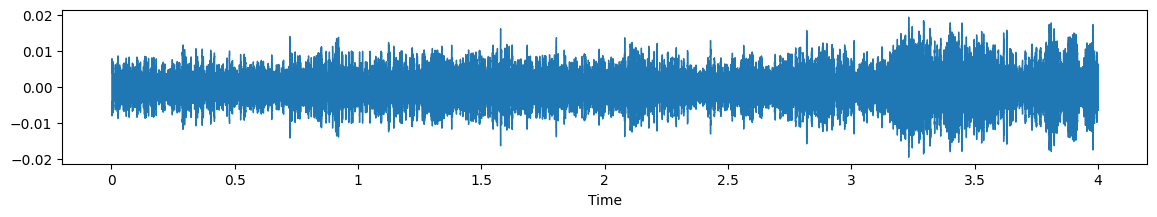

In [9]:
plt.figure(figsize=(14,2))
librosa_audio_data,librosa_audio_sample_rate=librosa.load(filename)
librosa.display.waveshow(librosa_audio_data,sr=librosa_audio_sample_rate)
plt.show()

In [11]:
librosa_audio_data

array([0.00426048, 0.00792833, 0.00714055, ..., 0.0058561 , 0.00561863,
       0.00630891], dtype=float32)

In [12]:
librosa_audio_sample_rate

22050

In [13]:
import pandas as pd
df=pd.read_csv("UrbanSound8K/metadata/UrbanSound8K.csv")
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [14]:
df['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

In [15]:
# scipy doesn't normalize data, stereo-channel
from scipy.io import wavfile
wave_sample_rate,wave=wavfile.read(filename)
wave_sample_rate

44100

In [16]:
wave

array([[219, 143],
       [215, 220],
       [204, 288],
       ...,
       [337,  41],
       [320,  71],
       [311,  92]], dtype=int16)

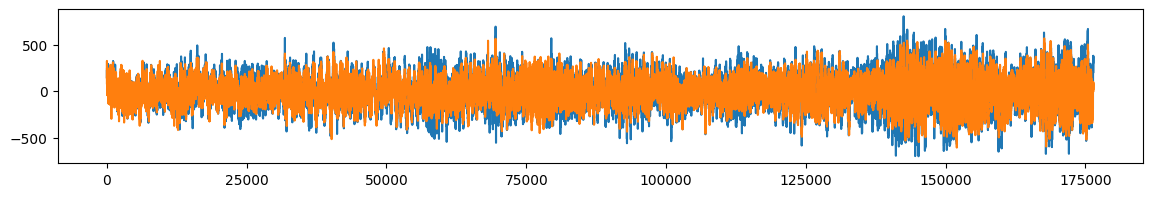

In [17]:
plt.figure(figsize=(14,2))
plt.plot(wave)
plt.show()

**When to Use Which?**
- **Use `librosa.load()`** when working with **speech/audio analysis, machine learning, deep learning, or music feature extraction**.
- **Use `scipy.io.wavfile.read()`** when you need **raw, unprocessed audio** with original integer values, stereo/multichannel support, or if you're working with **low-level signal processing**.

| Feature               | `librosa.load()`                    | `scipy.io.wavfile.read()`        |
|-----------------------|------------------------------------|----------------------------------|
| **Return Values**     | `(data, sample_rate)`             | `(sample_rate, data)`           |
| **Data Type**        | `float32` (values between -1 and 1) | `int16` or `int32` (raw format) |
| **Default Sample Rate** | **22050 Hz** (unless specified)   | Uses **original file sample rate** |
| **Resampling**       | **Yes** (if `sr` is specified)    | **No** (keeps original)         |
| **Mono vs Stereo**   | Converts to **mono** by default   | Keeps **stereo/multichannel**   |
| **Supported Formats** | WAV, MP3, FLAC, OGG, etc.        | **Only WAV**                    |
| **Use Cases**        | Feature extraction, ML, DL, speech/music analysis | Raw audio processing, stereo/multichannel handling |


## **Data preprocessing**
- **Mel-Frequency Cepstral Coefficients(MFCC)** : The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [18]:
mfcc_data=librosa.feature.mfcc(y=librosa_audio_data,sr=librosa_audio_sample_rate,n_mfcc=40)
mfcc_data.shape

(40, 173)

In [19]:
mfcc_data

array([[-4.7153787e+02, -4.4912976e+02, -4.4744662e+02, ...,
        -4.4174380e+02, -4.3948465e+02, -4.4826764e+02],
       [ 1.0039217e+02,  9.8589615e+01,  9.5115524e+01, ...,
         1.1791698e+02,  1.1520094e+02,  1.0672363e+02],
       [-2.1784363e+01, -2.0289974e+01, -2.0491684e+01, ...,
        -2.7890923e+01, -1.9016792e+01, -5.2057099e+00],
       ...,
       [-7.6563931e-01,  3.7504408e-01,  1.2162297e+00, ...,
         1.0650102e+00, -8.0676794e-02,  1.8818033e+00],
       [ 2.7869036e+00,  1.5277616e+00,  2.1518292e+00, ...,
        -1.1723332e+01, -1.1164776e+01, -6.5244632e+00],
       [ 3.9944468e+00, -3.0450654e+00, -6.5705299e+00, ...,
        -6.1732082e+00, -4.8374453e+00, -1.0105597e-02]], dtype=float32)

In [45]:
def feature_extractor(file):
    data,sample_rate=librosa.load(file,res_type='kaiser_fast')
    mfcc_features=librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=30)
    mfcc_features_scaled=np.mean(mfcc_features.T,axis=0)
    return mfcc_features_scaled

In [48]:
!pip install tqdm

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)


In [49]:
from tqdm import tqdm   # used for progress bars
import os

audio_dataset_path='UrbanSound8K/audio/'
extracted_features=[]
for index_num,row in tqdm(df.iterrows()):
    filename=os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row['fold'])+'/',str(row['slice_file_name']))
    file_class_labels=row['class']
    data=list(feature_extractor(filename))
    extracted_features.append([data,file_class_labels])

/Users/arpitpatel/Documents/dl/audio_classification/env1/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
/Users/arpitpatel/Documents/dl/audio_classification/env1/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/Users/arpitpatel/Documents/dl/audio_classification/env1/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(

732it [06:38, 21.91it/s]

In [50]:
len(extracted_features)

8732

In [51]:
extracted_features

[[[np.float32(-217.35526),
   np.float32(70.22339),
   np.float32(-130.38527),
   np.float32(-53.282898),
   np.float32(-21.199131),
   np.float32(-22.677624),
   np.float32(-10.855972),
   np.float32(18.294256),
   np.float32(6.6527033),
   np.float32(14.324023),
   np.float32(-12.167682),
   np.float32(2.2768369),
   np.float32(-17.779192),
   np.float32(10.388949),
   np.float32(-6.582836),
   np.float32(-0.6944572),
   np.float32(-18.336023),
   np.float32(1.9942532),
   np.float32(-5.1433306),
   np.float32(8.3024),
   np.float32(-12.645056),
   np.float32(-6.5297318),
   np.float32(4.617667),
   np.float32(-2.1799173),
   np.float32(-6.6628237),
   np.float32(0.35971096),
   np.float32(-3.9084103),
   np.float32(4.7756243),
   np.float32(-6.3845215),
   np.float32(-5.3798175)],
  'dog_bark'],
 [[np.float32(-424.09818),
   np.float32(109.34076),
   np.float32(-52.919525),
   np.float32(60.86475),
   np.float32(0.2452923),
   np.float32(17.347328),
   np.float32(2.0955827),
   np.f

In [55]:
dataframe = pd.DataFrame(extracted_features, columns=['feature', 'class'])
dataframe.head()

,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34076, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.3842, -46.520653, 52.00812, -...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402218, 60.302044,...",children_playing


In [56]:
# dataframe.to_csv('extracted_features.csv', index=False)

In [57]:
# dataframe=pd.read_csv('extracted_features.csv')
# dataframe.head()

In [58]:
X=np.array(dataframe['feature'].tolist())
y=np.array(dataframe['class'].tolist())

In [59]:
X.shape

(8732, 30)

In [60]:
y.shape

(8732,)

In [61]:
y=pd.get_dummies(y)

In [62]:
y.columns

Index(['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
       'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren',
       'street_music'],
      dtype='object')

In [63]:
y=np.array(y)

In [64]:
y.shape

(8732, 10)

In [65]:
y

array([[False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False]])

In [66]:
y=y.astype(int)

In [67]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [68]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape,y_train.shape

((6985, 30), (6985, 10))

In [69]:
print(X_train.dtype, y_train.dtype)  # Check data types

float32 int64


In [70]:
X_train

array([[-1.3110471e+02,  1.1250591e+02, -2.2574696e+01, ...,
        -1.0572993e+00, -2.0611889e+00,  3.5242116e+00],
       [-1.3670342e+01,  9.1085083e+01, -7.7927332e+00, ...,
        -1.9672565e+00, -9.3592281e+00, -6.0962262e+00],
       [-4.9871544e+01,  2.6535299e-01, -2.0500937e+01, ...,
         1.3284229e+00, -7.9714413e+00,  7.0145518e-01],
       ...,
       [-4.2701236e+02,  9.2623047e+01,  3.1293974e+00, ...,
        -1.7838219e+00, -1.5918899e+00, -1.7047207e+00],
       [-1.4575461e+02,  1.3626578e+02, -3.3515522e+01, ...,
         4.1547985e+00, -2.2235024e+00,  3.5612748e+00],
       [-4.2103134e+02,  2.1065454e+02,  3.4906609e+00, ...,
        -4.6783547e+00, -4.6562533e+00, -6.1745815e+00]], dtype=float32)

In [71]:
y_train

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

## **Model Creation**

In [72]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [73]:
tf.__path__

['/Users/arpitpatel/Documents/dl/audio_classification/env1/lib/python3.10/site-packages/keras/api/_v2',
 '/Users/arpitpatel/Documents/dl/audio_classification/env1/lib/python3.10/site-packages/keras/_tf_keras',
 '/Users/arpitpatel/Documents/dl/audio_classification/env1/lib/python3.10/site-packages/tensorflow',
 '/Users/arpitpatel/Documents/dl/audio_classification/env1/lib/python3.10/site-packages/tensorflow/_api/v2']

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [75]:
no_of_classes=y.shape[1]
no_of_classes

10

In [76]:
model=Sequential()
model.add(Dense(100,input_shape=(30,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(no_of_classes))
model.add(Activation('softmax'))
model.summary()

/Users/arpitpatel/Documents/dl/audio_classification/env1/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 100)            │         3,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,410 (173.48 KB)

 Trainable params: 44,410 (173.48 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

In [78]:
# model training
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, 
          y_train, 
          batch_size=num_batch_size, 
          epochs=num_epochs, 
          validation_data=(X_test, y_test), 
          callbacks=[checkpointer], 
          verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100

Epoch 1: val_loss improved from inf to 2.27894, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1168 - loss: 22.1450 - val_accuracy: 0.1162 - val_loss: 2.2789
Epoch 2/100

Epoch 2: val_loss improved from 2.27894 to 2.26441, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1454 - loss: 2.5664 - val_accuracy: 0.1265 - val_loss: 2.2644
Epoch 3/100

Epoch 3: val_loss improved from 2.26441 to 2.24483, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1490 - loss: 2.3376 - val_accuracy: 0.1328 - val_loss: 2.2448
Epoch 4/100

Epoch 4: val_loss improved from 2.24483 to 2.19504, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1448 - loss: 2.2705 - val_accuracy: 0.1643 - val_loss: 2.1950
Epoch 5/100

Epoch 5: val_loss improved from 2.1950

In [81]:
filename="UrbanSound8K/audio/fold2/100652-3-0-2.wav"
prediction_feature=feature_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
prediction = model.predict(prediction_feature)

predicted_class = np.argmax(prediction, axis=1)  # Get class index
print(predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[3]


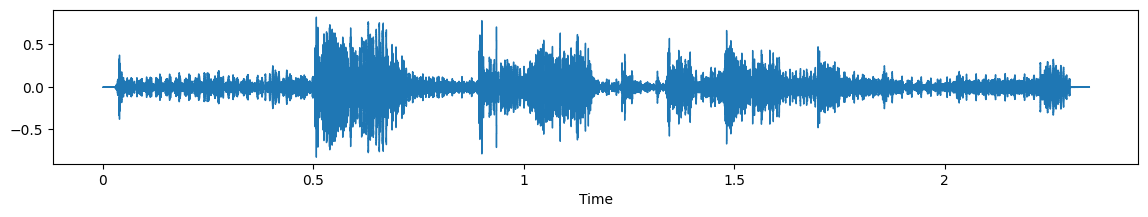

In [84]:
filename="chin_tapak_dum_dum.mp3"
plt.figure(figsize=(14,2))
librosa_audio_data,librosa_audio_sample_rate=librosa.load(filename)
librosa.display.waveshow(librosa_audio_data,sr=librosa_audio_sample_rate)
plt.show()

In [85]:
ipd.Audio(filename)

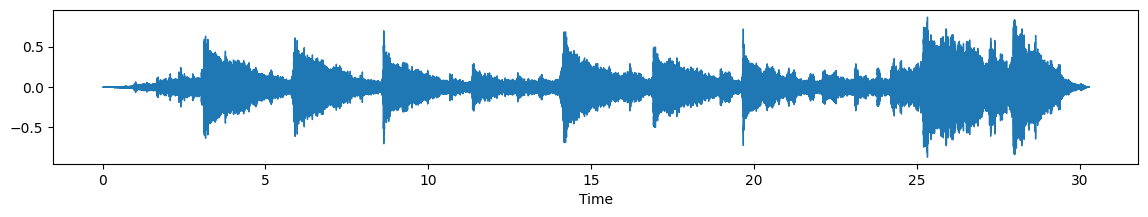

In [86]:
filename="DARK theme Song Ringtone _ Dark Series Whatsapp status tamil _ Netflix series (128 kbps).mp3"
plt.figure(figsize=(14,2))
librosa_audio_data,librosa_audio_sample_rate=librosa.load(filename)
librosa.display.waveshow(librosa_audio_data,sr=librosa_audio_sample_rate)
plt.show()

In [87]:
ipd.Audio(filename)